In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Load in both listings and address datasets

In [2]:
listings = pd.read_csv('rex_discover_2020-10-01/listing.csv')
addr = pd.read_csv('rex_discover_2020-10-01/address.csv')

/Users/nikhilvanderklaauw/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (25,44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/nikhilvanderklaauw/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(listings.shape)
print('Unique Address IDs', listings['address_id'].nunique())
print('Duplicates',listings.shape[0]-listings['address_id'].nunique())
listings.head(2)

(129153, 45)
Unique Address IDs 128963
Duplicates 190


,id,guid,created,updated,address_id,bedrooms,coming_soon_date,competitive_bidding_expiration_date,county,description,engagement_agreement_end,engagement_agreement_start,full_baths,grade,half_baths,hoa_fee,land_square_footage,latitude,listed_date,living_square_feet,longitude,loss_date,loss_type,market,marketing_budget,marketing_status,neighborhood,on_mls,price,property_type,publish_date,rex_url,sales,school_district_id,school_district_name,signed_date,sold_date,status,stories,timezone_id,total_baths,total_baths_calculated,total_rooms,year_built,geom
0,3,7a51c98bb10b4f04a3ef19e6ca6605a1,2015-03-30 21:20:17,2018-02-21 21:14:36,4,4.0,NaN,2016-05-12 10:00:44,Ventura,"Single story, 4 bedrooms, 3 baths, plus bonus ...",2015-09-08,2015-04-08,NaN,NaN,NaN,NaN,21300.0,34.198950,2015-05-01,2932.0,-118.899352,NaN,NaN,VC,LOW,0,NaN,0,980000.0,SINGLE,2015-05-01 00:00:00,1335-calle-pecos,VC,NaN,NaN,NaN,2015-09-11,SOLD,1.0,America/Los_Angeles,3.0,NaN,8.0,1963.0,NaN
1,22,63390d5e80d94d62875224a90d599f2f,2015-04-22 19:34:25,2015-04-22 19:34:26,20,3.0,NaN,NaN,Los Angeles,NaN,NaN,NaN,2.0,NaN,0.0,NaN,4549.0,34.015585,NaN,1274.0,-118.409200,NaN,NaN,LA,LOW,0,NaN,0,NaN,SINGLE,2015-04-22 19:34:26,3848-spad-pl,LA,NaN,NaN,NaN,NaN,PREVIEW,0.0,America/Los_Angeles,2.0,2.0,0.0,1947.0,NaN


In [4]:
print(addr.shape)
print('Unique Address IDs', addr['id'].nunique())
print('Duplicates',addr.shape[0]-addr['id'].nunique())
addr.head(2)

(128950, 8)
Unique Address IDs 128950
Duplicates 0


,id,guid,address_line,city,state,postal_code,created,updated
0,360,75bb16cdde1e40d3bacfcde645ffa1b2,1245 Cordova St Apt 301,Pasadena,CA,91106,2016-05-21 15:30:03,2016-05-21 15:30:03
1,361,27972de492f4441fbc62a55908b9ba79,216 S Madison Ave Apt 205,Pasadena,CA,91101,2016-05-21 16:44:31,2016-05-21 16:44:31


In [5]:
df_all = addr.merge(listings, how='inner', left_on='id', right_on='address_id')

In [6]:
print(df_all.shape)
print('Duplicates',df_all.shape[0]-df_all['address_id'].nunique())

(128998, 53)
Duplicates 190


In [7]:
df_all.columns

Index(['id_x', 'guid_x', 'address_line', 'city', 'state', 'postal_code',
       'created_x', 'updated_x', 'id_y', 'guid_y', 'created_y', 'updated_y',
       'address_id', 'bedrooms', 'coming_soon_date',
       'competitive_bidding_expiration_date', 'county', 'description',
       'engagement_agreement_end', 'engagement_agreement_start', 'full_baths',
       'grade', 'half_baths', 'hoa_fee', 'land_square_footage', 'latitude',
       'listed_date', 'living_square_feet', 'longitude', 'loss_date',
       'loss_type', 'market', 'marketing_budget', 'marketing_status',
       'neighborhood', 'on_mls', 'price', 'property_type', 'publish_date',
       'rex_url', 'sales', 'school_district_id', 'school_district_name',
       'signed_date', 'sold_date', 'status', 'stories', 'timezone_id',
       'total_baths', 'total_baths_calculated', 'total_rooms', 'year_built',
       'geom'],
      dtype='object')

### Subset to Suffolk County

In [8]:
df_suffolk = df_all[(df_all.county.str.lower()=='suffolk') & (df_all.state=='MA')]

In [9]:
print(df_suffolk.shape)

(260, 53)


## Column Missingness

In [10]:
col_missing = ((df_all.isna().sum()/len(df_all))*100).sort_values(ascending=False)
col_missing

geom                                   99.999225
grade                                  98.521683
sold_date                              98.396874
neighborhood                           98.092218
loss_date                              97.958883
hoa_fee                                97.588335
coming_soon_date                       96.775144
engagement_agreement_end               96.173584
engagement_agreement_start             96.172809
listed_date                            96.098389
signed_date                            96.050326
loss_type                              95.423185
description                            95.381324
competitive_bidding_expiration_date    94.861161
price                                  94.784415
publish_date                           88.372688
half_baths                             87.028481
total_rooms                            55.967534
bedrooms                               32.343137
full_baths                             24.380223
total_baths_calculat

A bit surprising. Many columns almost 100% missing:
* neighborhood
* publish date, listed date
* description
* price
* hoa_fee
* bedrooms

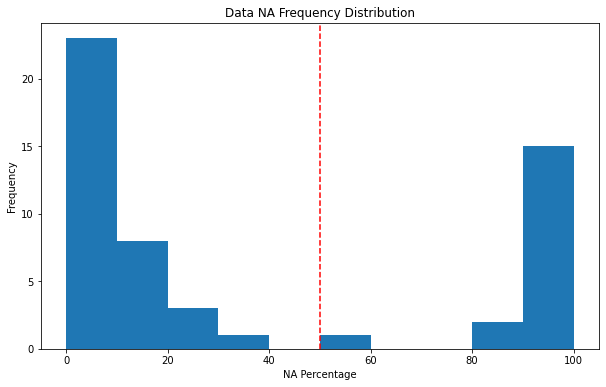

In [11]:
plt.figure(figsize=(10,6))
plt.hist(col_missing)
plt.axvline(x=50, c="red", ls="--")
plt.xlabel("NA Percentage")
plt.ylabel("Frequency")
plt.title("Data NA Frequency Distribution")
plt.show()

## Drop columns with more than 50% missing

In [12]:
dfs = df_suffolk.drop(list(col_missing[col_missing>50].index),axis=1)

In [13]:
dfs.head()

,id_x,guid_x,address_line,city,state,postal_code,created_x,updated_x,id_y,guid_y,created_y,updated_y,address_id,bedrooms,county,full_baths,land_square_footage,latitude,living_square_feet,longitude,market,marketing_budget,marketing_status,on_mls,property_type,rex_url,sales,school_district_id,school_district_name,status,stories,timezone_id,total_baths,total_baths_calculated,year_built
43505,44479,145d77f884df42998086ae47a2f756a6,35 Webster St Apt 302,East Boston,MA,2128,2019-04-20 15:18:41,2019-04-20 15:18:41,45322,4368b4c6c63a401fafdeeec31b90b1e8,2019-04-20 15:18:40.612000,2019-04-20 15:18:40.612000,44479,2.0,Suffolk,1.0,883.0,42.367181,883.0,-71.039099,BOS,LOW,0,0,CONDO,35-webster-st-apt-302,BOS,2502790.0,Boston School District,PREVIEW,1.0,America/New_York,1.0,1.0,1985.0
44009,44986,c6b3b15dc6964a59a20f120986117e7b,1204 Morton St,Mattapan,MA,2126,2019-04-23 23:57:17,2019-04-23 23:57:17,45829,7bb5993c939348f1b594c76d399e7254,2019-04-23 23:57:17.122000,2019-04-23 23:57:17.122000,44986,2.0,Suffolk,1.0,3385.0,42.274778,1214.0,-71.071313,BOS,LOW,0,0,SINGLE,1204-morton-st,BOS,2502790.0,Boston School District,PREVIEW,2.0,America/New_York,2.0,2.0,1920.0
44609,45590,d4e685ad98d2458b955b69fa365e0f33,198 Metropolitan Ave,Roslindale,MA,2131,2019-04-28 15:37:54,2019-04-28 15:37:54,46433,d6e75ab843a14a9085de5802a854e1b0,2019-04-28 15:37:53.832000,2019-04-28 15:37:53.832000,45590,3.0,Suffolk,1.0,14799.0,42.278081,2280.0,-71.127313,BOS,LOW,0,0,SINGLE,198-metropolitan-ave,BOS,2502790.0,Boston School District,PREVIEW,3.0,America/New_York,2.0,2.0,1910.0
45002,45986,52eb1763508642e5afc08efea8f89499,85 E India Row Apt 26d,Boston,MA,2110,2019-05-01 13:13:46,2019-05-01 13:13:46,46829,f239d7e541714f2387a17663d2ba77dd,2019-05-01 13:13:45.771000,2019-05-01 13:13:45.771000,45986,1.0,Suffolk,1.0,NaN,42.358376,749.0,-71.049001,BOS,LOW,0,0,CONDO,85-e-india-row-apt-26d,BOS,2502790.0,Boston School District,PREVIEW,1.0,America/New_York,1.0,1.0,1972.0
46372,47360,791ea996f7ce480a9a8a001b657b1491,10 Lesher St,Roslindale,MA,2131,2019-05-12 12:58:46,2019-05-12 12:58:46,48203,83eae477840a44a8b33c292b77d4d4da,2019-05-12 12:58:46.176000,2019-05-12 12:59:16.505000,47360,4.0,Suffolk,2.0,3999.0,42.292493,2151.0,-71.122719,BOS,LOW,0,0,MULTI_FAMILY,10-lesher-st,BOS,2502790.0,Boston School District,CLAIMED,2.0,America/New_York,2.0,2.0,1915.0


Potentially Useful:
* City
* Created
* status (claimed, inactive, preview, sold)

* land_square_footage
* living_square_feet
* property_type
* year_built

--
* stories
* bedrooms
* total_rooms
* full_baths
* total_baths
* total_baths_calculated

In [14]:
# is there a mismatch?
sum(dfs.total_baths!=dfs.total_baths_calculated)

89

Decide to just take total_baths_calculated

/Users/nikhilvanderklaauw/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


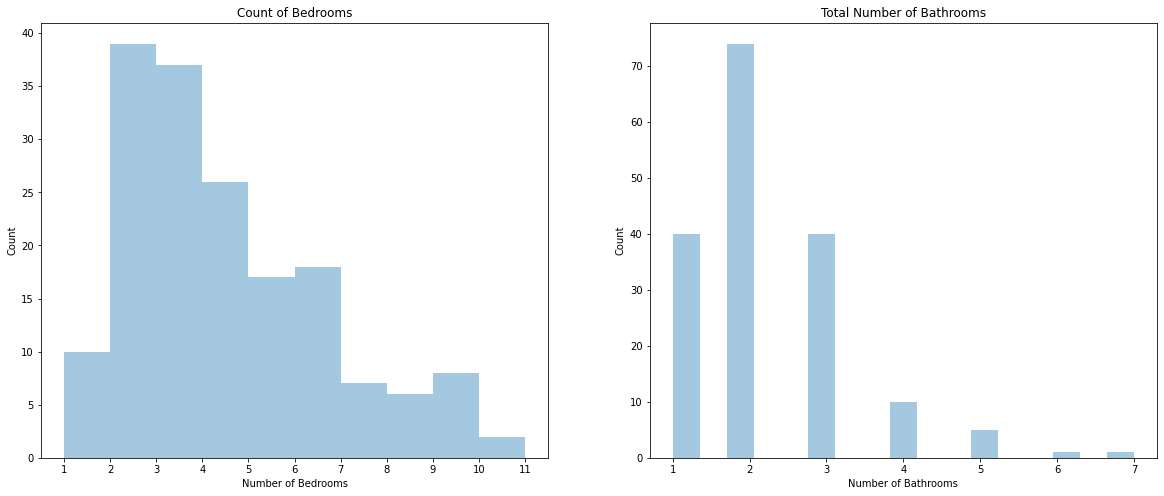

In [15]:
bins = list(range(1,12))
bathcounts = dfs.total_baths.value_counts()

fig, axs = plt.subplots(1,2,figsize=(20,8))

sns.distplot(dfs.bedrooms, bins=bins,kde=False,ax=axs[0])
axs[0].set_title('Count of Bedrooms')
axs[0].set_xlabel('Number of Bedrooms')
axs[0].set_ylabel('Count')
axs[0].set_xticks(bins)


# sns.barplot(bathcounts.index, bathcounts.values)
sns.distplot(dfs.total_baths_calculated, kde=False, ax=axs[1])
axs[1].set_title('Total Number of Bathrooms')
axs[1].set_xlabel('Number of Bathrooms')
axs[1].set_ylabel('Count')

plt.show()

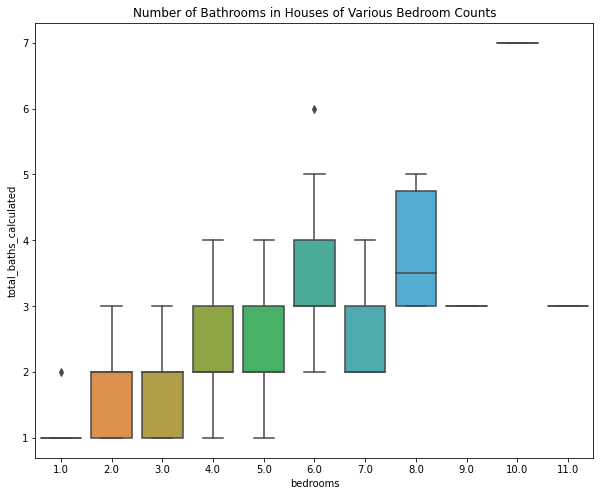

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(x="bedrooms", y="total_baths_calculated", data=dfs)
plt.title('Number of Bathrooms in Houses of Various Bedroom Counts')
plt.show()

/Users/nikhilvanderklaauw/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


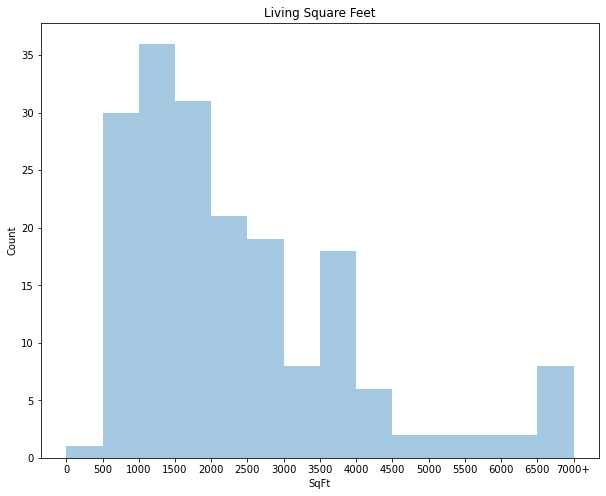

In [17]:
bins = np.arange(0,7500,500)
xlabels = list(map(str, bins[0:]))
xlabels[-1] += '+'
    
plt.figure(figsize=(10,8))
sns.distplot(np.clip(dfs.living_square_feet, bins[0], bins[-1]), bins=bins, kde=False)
plt.title('Living Square Feet')
plt.xlabel('SqFt')
plt.ylabel('Count')
plt.xticks(bins,xlabels)
plt.show()

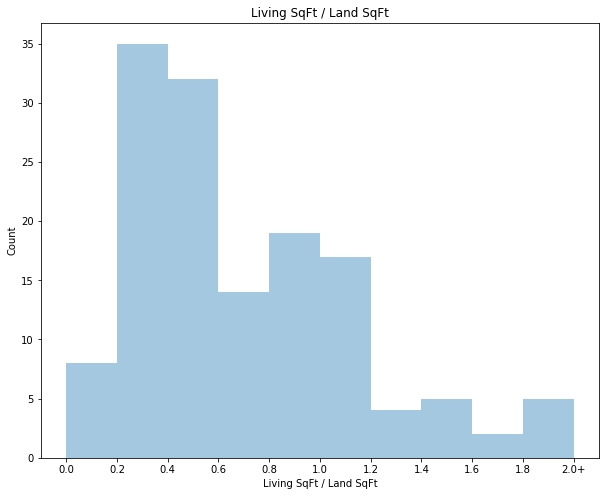

In [18]:
bins = np.round(np.arange(0,2.2,0.2),1)
xlabels = list(map(str, bins[0:]))
xlabels[-1] += '+'
    
plt.figure(figsize=(10,8))
sns.distplot(np.clip(dfs.living_square_feet/dfs.land_square_footage, bins[0], bins[-1]), bins=bins, kde=False)
plt.title('Living SqFt / Land SqFt')
plt.xlabel('Living SqFt / Land SqFt')
plt.ylabel('Count')
plt.xticks(bins,xlabels)
plt.show()

/Users/nikhilvanderklaauw/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


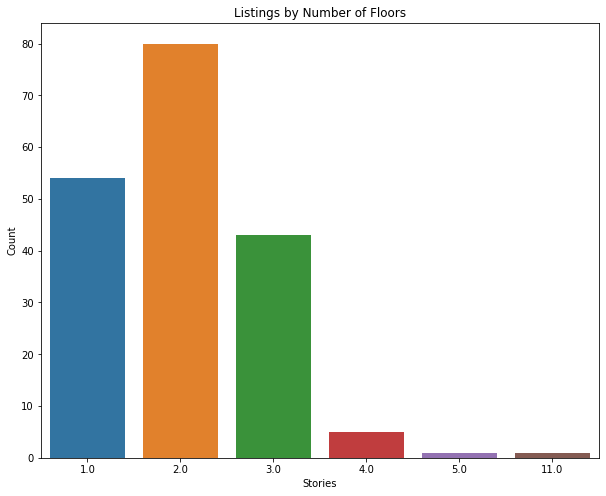

In [19]:
storiescounts = dfs.stories.value_counts()

plt.figure(figsize=(10,8))
sns.barplot(storiescounts.index, storiescounts.values)
plt.title('Listings by Number of Floors')
plt.xlabel('Stories')
plt.ylabel('Count')
plt.show()

/Users/nikhilvanderklaauw/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


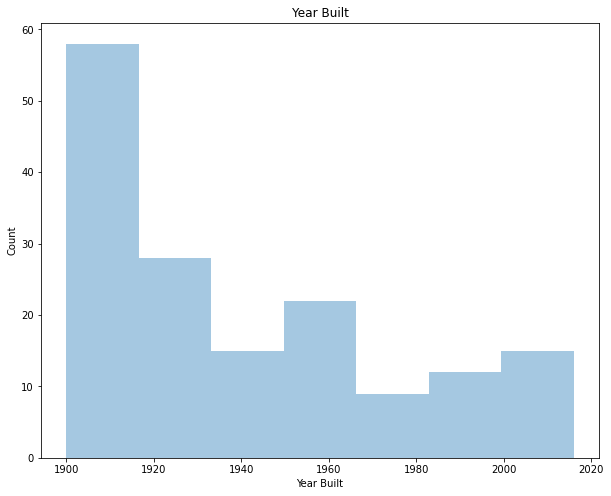

In [20]:
plt.figure(figsize=(10,8))
sns.distplot(dfs.year_built,kde=False)
plt.title('Year Built')
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.show()

In [21]:
def help_year_bins(x):
    if x<1900:
        return 'Before 1900'
    elif x<1950:
        return '1900 to 1950'
    elif x<2000:
        return '1950 to 2000'
    else:
        return 'After 2000'

dfs['year_bins'] = dfs.year_built.apply(lambda x: help_year_bins(x))

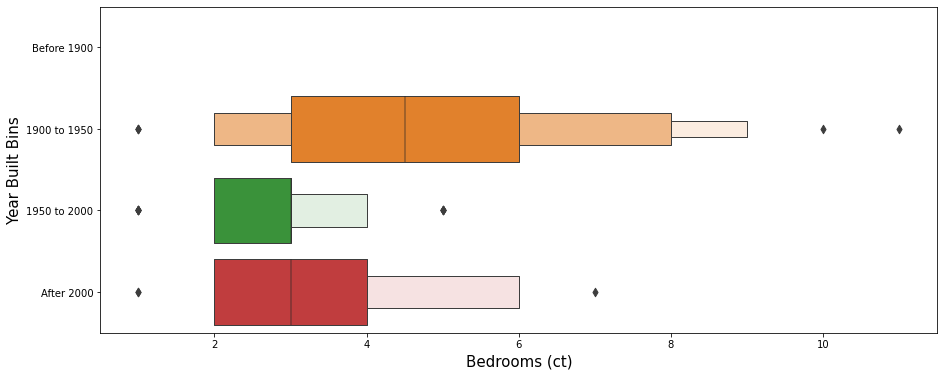

In [22]:
plt.figure(figsize=(15,6))
sns.boxenplot(y='year_bins', x='bedrooms', data=dfs,
              order=['Before 1900', '1900 to 1950', '1950 to 2000','After 2000'])
plt.xlabel("Bedrooms (ct)", fontsize=15)
plt.ylabel("Year Built Bins", fontsize=15)
plt.show()

/Users/nikhilvanderklaauw/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


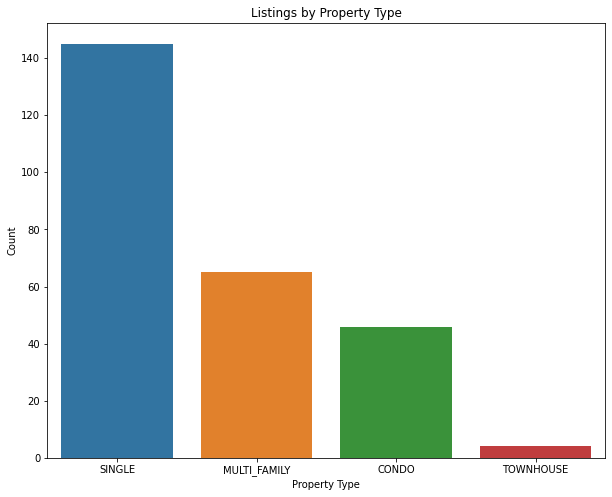

In [23]:
propertycounts = dfs.property_type.value_counts()

plt.figure(figsize=(10,8))
sns.barplot(propertycounts.index, propertycounts.values)
plt.title('Listings by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.show()

/Users/nikhilvanderklaauw/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


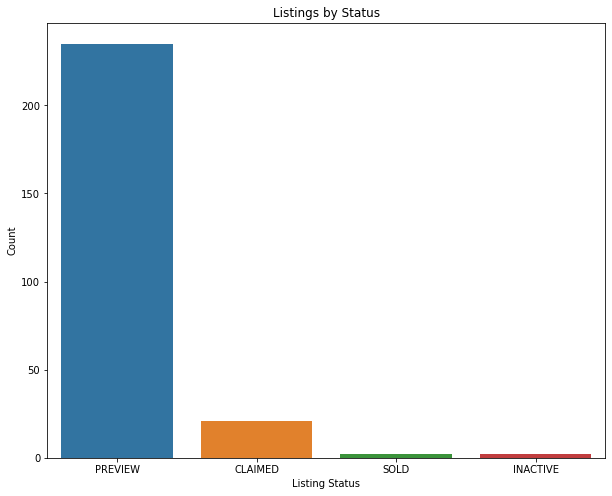

In [24]:
statuscounts = dfs.status.value_counts()

plt.figure(figsize=(10,8))
sns.barplot(statuscounts.index, statuscounts.values)
plt.title('Listings by Status')
plt.xlabel('Listing Status')
plt.ylabel('Count')
plt.show()

/Users/nikhilvanderklaauw/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


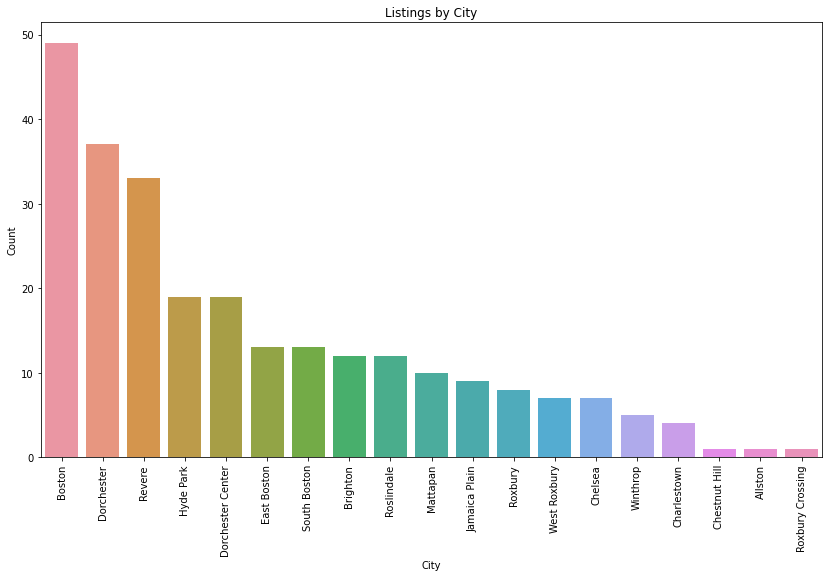

In [25]:
citycounts = dfs.city.value_counts()

plt.figure(figsize=(14,8))
sns.barplot(citycounts.index, citycounts.values)
plt.title('Listings by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [26]:
sum(df_all.on_mls)

56

## Trying to join to MLS

In [27]:
mls_df = pd.read_csv('join_house_market_to_first_american_25025.csv')

/Users/nikhilvanderklaauw/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (20,55,56,65,66,67,68,69,78,82) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
mls_df['addr_lower_y'] = mls_df.address.str.lower()
mls_df['addr_lower_y'] = mls_df.addr_lower_y.str.strip()

In [29]:
df_all['addr_lower_x'] = df_all.address_line.str.lower()
df_all['addr_lower_x'] = df_all.addr_lower_x.str.strip()

In [30]:
df_joined = df_all.merge(mls_df, how='inner', left_on=['addr_lower_x','postal_code'], right_on=['addr_lower_y','zipcode'])


In [31]:
df_joined.shape

(24, 138)

In [36]:
df_joined[['addr_lower_x','on_mls']]

,addr_lower_x,on_mls
0,35 webster st apt 302,0
1,35 webster st apt 302,0
2,35 webster st apt 302,0
3,338 highland st,0
4,1204 morton st,0
5,1204 morton st,0
6,9 holbrook ave,0
7,20 conant rd,0
8,227 proctor ave,0
9,227 proctor ave,0


Pretty bad match rate

In [59]:
df_suffolk[df_suffolk['on_mls']==1]['address_line']

Series([], Name: address_line, dtype: object)

In [60]:
#mls_df[mls_df['addr_lower_y'].str.contains("essex")]['address']

### Attempting a join on lat/long

In [32]:
df_all_coords = df_all[df_all.latitude.notnull() & df_all.longitude.notnull()].copy()
mls_df_coords = mls_df[mls_df.latitude.notnull() & mls_df.longitude.notnull()].copy()

In [33]:
df_all_coords['latx'] = df_all_coords.latitude.round(4)
mls_df_coords['laty'] = mls_df_coords.latitude.round(4)

df_all_coords['longx'] = df_all_coords.longitude.round(4)
mls_df_coords['longy'] = mls_df_coords.longitude.round(4)

In [34]:
testjoin = df_all_coords.merge(mls_df_coords, how='inner', left_on=['latx','longx'], right_on=['laty','longy'])

In [35]:
testjoin[['addr_lower_x','latx','longx','addr_lower_y','laty','longy']].head(10)

,addr_lower_x,latx,longx,addr_lower_y,laty,longy
0,889 date st unit 545,32.7226,-117.1570,889 date st unit 205,32.7226,-117.1570
1,889 date st unit 545,32.7226,-117.1570,aloft on cortez hill,32.7226,-117.1570
2,889 date st unit 545,32.7226,-117.1570,aloft on cortez hill,32.7226,-117.1570
3,889 date st unit 545,32.7226,-117.1570,aloft on cortez hill,32.7226,-117.1570
4,35 webster st apt 302,42.3672,-71.0391,10 orleans st unit 106,42.3672,-71.0391
5,35 webster st apt 302,42.3672,-71.0391,10 orleans st #203,42.3672,-71.0391
6,35 webster st apt 302,42.3672,-71.0391,10 orleans st unit 203,42.3672,-71.0391
7,35 webster st apt 302,42.3672,-71.0391,35 webster st apt 302,42.3672,-71.0391
8,35 webster st apt 302,42.3672,-71.0391,10b orleans street 106,42.3672,-71.0391
9,338 highland st,42.2373,-71.1834,338 highland st,42.2373,-71.1834


Not a very successful alternative